In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, ConcatDataset

from torchvision import models, transforms
import DatasetReader as DatasetReader
import matplotlib.pyplot as plt
import utils as utils
import time
import datetime
import os
import numpy as np

torch.Size([3, 224, 224])
12


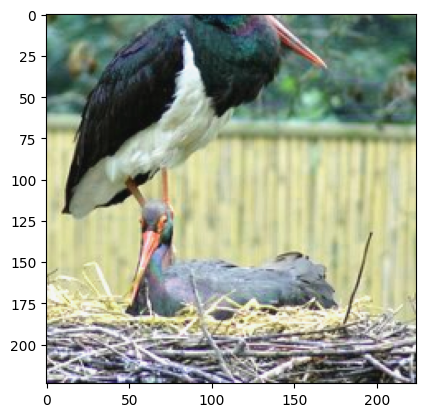

In [57]:
class_names = [s.lower().replace(' ', '_') for s in utils.GLOBAL_CLASSES]
transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.RandomHorizontalFlip(p = 0.3),
    transforms.ColorJitter(brightness = 0.5, contrast = 0.2, saturation = 0.1, hue = 0.05),
    transforms.ToTensor(),  
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
])


root_folder = '/home/centar15-desktop1/LPCV_2025_T1/datasets/imagenet/coco_80'
dataset = DatasetReader.CustomImageFolder(root_dir=root_folder, class_names=class_names, transform=transform)

print(dataset[10000][0].shape)
print(dataset[10000][1])

plt.figure() 
plt.imshow(np.transpose(dataset[10000][0], (1, 2, 0)))
plt.show()



In [4]:
dataset_coco = DatasetReader.COCODataset(annotation_file='/home/centar15-desktop1/LPCV_2025_T1/datasets/coco/annotations/instances_train2017.json',
    image_dir= '/home/centar15-desktop1/LPCV_2025_T1/datasets/coco/train2017',
    target_classes=[s.lower() for s in utils.GLOBAL_CLASSES],
    transform=transform)


In [5]:
print(len(dataset_coco))
print(len(dataset))


532797
139268


In [6]:
concatenated_dataset = ConcatDataset([dataset_coco, dataset])


In [7]:
print(len(concatenated_dataset))

672065
